In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def getNum(letter):
    return ord(letter) - ord("A")

def getLetter(num):
    return chr(num + ord("A"))

[getLetter(num) for num in range(5)]

['A', 'B', 'C', 'D', 'E']

[[False, True, False, False, False],
 [True, False, True, False, False],
 [False, True, False, False, False],
 [False, False, False, False, True],
 [False, False, False, True, False]]

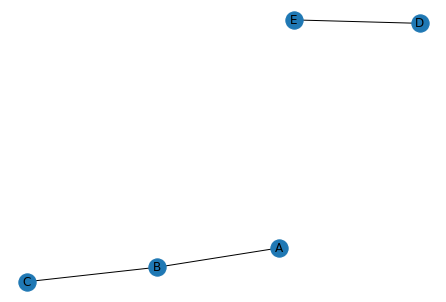

In [78]:
V = 5
E = 3
edges = [("A","B"),("B","C"),("D","E")]

def drawgraph(V, edges, f=0):
    G = nx.Graph()
    G.add_nodes_from([getLetter(num) for num in range(V)])
    G.add_edges_from(edges)
    plt.figure(f)
    plt.clf()
    nx.draw(G, with_labels=True)

drawgraph(V, edges)

def AdjacencyMatrix(V, edges):
    graph = [[False]*V for _ in range(V) ]

    for edge in edges:
        X,Y = (edge)
        i, j = getNum(X),getNum(Y)

        graph[i][j] = True
        graph[j][i] = True
    return graph

AdjacencyMatrix(V, edges)

In [113]:
def contacts(graph, investor):

    size = len(graph)
    family = [investor]
    stack = [investor]
    visited = [False]*size
    visited[investor] = True

    while stack:
        node = stack.pop()

        visited = [False]*size
        for i in family:
            visited[i] = True


        for i in range(size):
            if not visited[i]:
                visited[i] = True
                if graph[node][i]==True:
                    family.append(i)
                    stack.append(i)

    
    return family

[0, 3, 6, 2, 4, 5]

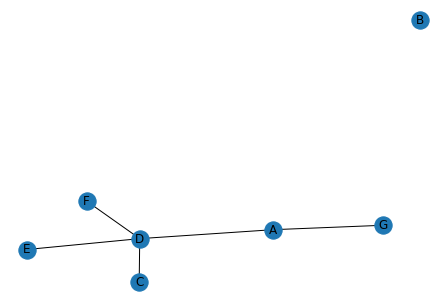

In [114]:
V = 7
E = 5
edges = [('D', 'C'), ('D', 'E'), ('A', 'G'), ('D', 'A'), ('F', 'D')]

graph = AdjacencyMatrix(V,edges)
drawgraph(V, edges, f=1000)

contacts(graph,0)

In [55]:
def intersection(L1, L2):

    L3 = []

    for e in L1:
        if e in L2:
            L3.append(e)
    return L3

def union(L1, L2):

    L3 = L1.copy()
    
    for e in L2:
        if e not in L1:
            L3.append(e)
    
    return L3

L1 = [0,1,2,3,4,5,6]
L2 = L1.copy()
L3 = intersection(L1, L2)
print(L1, "\n", L2, "\n", L3)

[0, 1, 2, 3, 4, 5, 6] 
 [0, 1, 2, 3, 4, 5, 6] 
 [0, 1, 2, 3, 4, 5, 6]


In [84]:
def check_connection(graph, investor1, investor2):

    size = len(graph)

    contacts1 = contacts(graph, investor1)
    contacts2 = contacts(graph, investor2)

    inter = intersection(contacts1, contacts2)
    print(contacts1, contacts2)

    totalcontacts = union(contacts1, contacts2)
    totalcontacts.sort()
    totalcontactsletters = [getLetter(c) for c in totalcontacts]
    word = ""
    for c in totalcontactsletters:
            word = word + c
    
    if len(inter) == 0:
        
        graph[investor1][investor2] = True
        graph[investor2][investor1] = True

        print("T", word)
        return True
    
    else:
        print("F", word)
        return False


A G
[0] [6]
T AG
[('D', 'C'), ('D', 'E'), ('A', 'G')]


D A
[3, 2, 4] [0, 6]
T ACDEG
[('D', 'C'), ('D', 'E'), ('A', 'G'), ('D', 'A')]


A A
[0, 3, 6, 2, 4] [0, 3, 6, 2, 4]
F ACDEG
[('D', 'C'), ('D', 'E'), ('A', 'G'), ('D', 'A')]


F D
[5] [3, 0, 2, 4, 6]
T ACDEFG
[('D', 'C'), ('D', 'E'), ('A', 'G'), ('D', 'A'), ('F', 'D')]


C E
[2, 3, 0, 4, 5, 6] [4, 3, 0, 2, 5, 6]
F ACDEFG
[('D', 'C'), ('D', 'E'), ('A', 'G'), ('D', 'A'), ('F', 'D')]




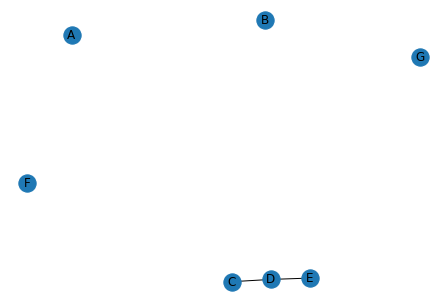

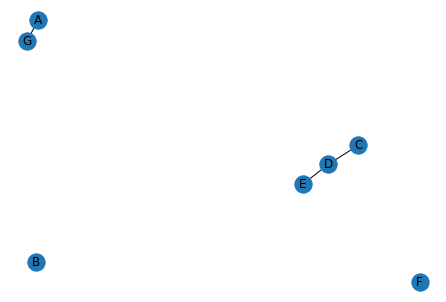

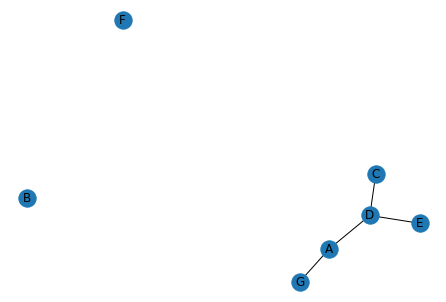

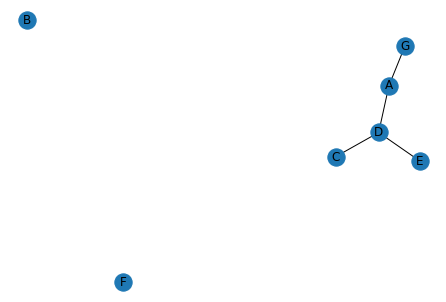

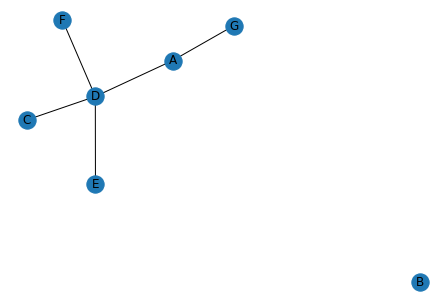

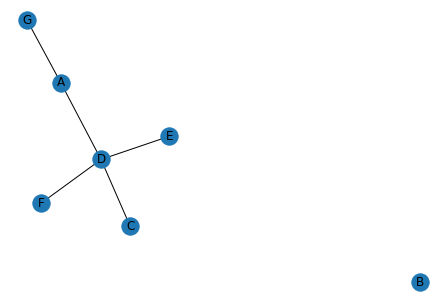

In [115]:
V = 7
E = 2
edges = [("D", "C"), ("D", "E")]
f = 0
drawgraph(V, edges, 0)
graph = AdjacencyMatrix(V,edges)

queries = [(0,6), (3,0), (0,0), (5,3), (2,4)]


for q in queries:
    print(getLetter(q[0]), getLetter(q[1]))
    b = check_connection(graph,q[0], q[1])
    
    f = f +1
    if b:
        edges.append((getLetter(q[0]), getLetter(q[1])))
    print(edges)
    drawgraph(V, edges,f)
    print("\n")

#drawgraph(V, edges)


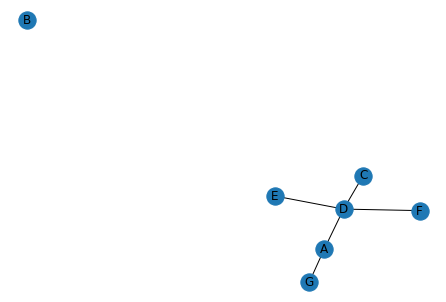

In [74]:
V = 7
edges = [('D', 'C'), ('D', 'E'), ('A', 'G'), ('D', 'A'), ('F', 'D')]
drawgraph(V, edges)